# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#id3

In [1]:
from sklearn import datasets

X, y = datasets.make_hastie_10_2(n_samples=12_000, random_state=1)

In [2]:
X

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -0.7612069 ,
         0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , ..., -0.87785842,
         0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072, ..., -0.93576943,
        -0.26788808,  0.53035547],
       ...,
       [-0.93116013, -1.66204029,  0.30451552, ..., -0.13420095,
         0.29183149, -0.43300684],
       [-1.3787448 ,  0.83384136, -1.53900483, ...,  0.89981334,
        -1.44271785,  2.51028547],
       [ 0.82776805,  2.04855517,  2.77822335, ...,  0.12579842,
        -0.1916412 ,  0.67553921]])

In [6]:
import pandas as pd

X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203
...,...,...,...,...,...,...,...,...,...,...
11995,0.330458,-0.839246,0.775767,1.799757,0.493924,-0.600830,0.941952,0.217338,-2.935343,0.286401
11996,-0.681792,-2.725074,-2.221681,-0.421381,-1.389101,-1.112687,1.336292,1.065429,0.023657,-0.716455
11997,-0.931160,-1.662040,0.304516,0.928442,-0.175916,-0.571552,-0.979131,-0.134201,0.291831,-0.433007
11998,-1.378745,0.833841,-1.539005,0.043063,1.922417,-0.604007,0.989463,0.899813,-1.442718,2.510285


In [7]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.006461,0.013649,0.004248,0.009374,0.013797,0.001231,-0.004841,-0.011252,0.004125,-0.000418
std,1.006256,0.992461,1.001116,0.990866,1.005731,0.997835,1.000432,0.992670,0.991862,1.006202
min,-3.656440,-3.561627,-4.041680,-4.088489,-3.927514,-3.694204,-4.326887,-3.936503,-3.943142,-3.717130
25%,-0.680163,-0.653343,-0.663238,-0.661357,-0.677973,-0.665484,-0.686045,-0.686974,-0.653672,-0.668544
50%,0.011920,0.000328,0.008353,0.012409,0.025004,-0.005523,-0.010727,-0.006082,0.006028,-0.001927
75%,0.689830,0.679310,0.685559,0.675380,0.685220,0.659380,0.665652,0.649902,0.676325,0.663594
max,3.702193,3.951352,3.664094,3.997723,4.055538,4.026849,4.168118,3.559969,3.590576,3.500256


In [8]:
n_estimators = 400
learning_rate = 1.0

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

dt_stump_err,dt_err

(0.4505, 0.2965)

In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada_discrete = AdaBoostClassifier(
    estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME",
)
ada_discrete.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [11]:
ada_real = AdaBoostClassifier(
    estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R",
)
ada_real.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [12]:
import numpy as np

from sklearn.metrics import zero_one_loss

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

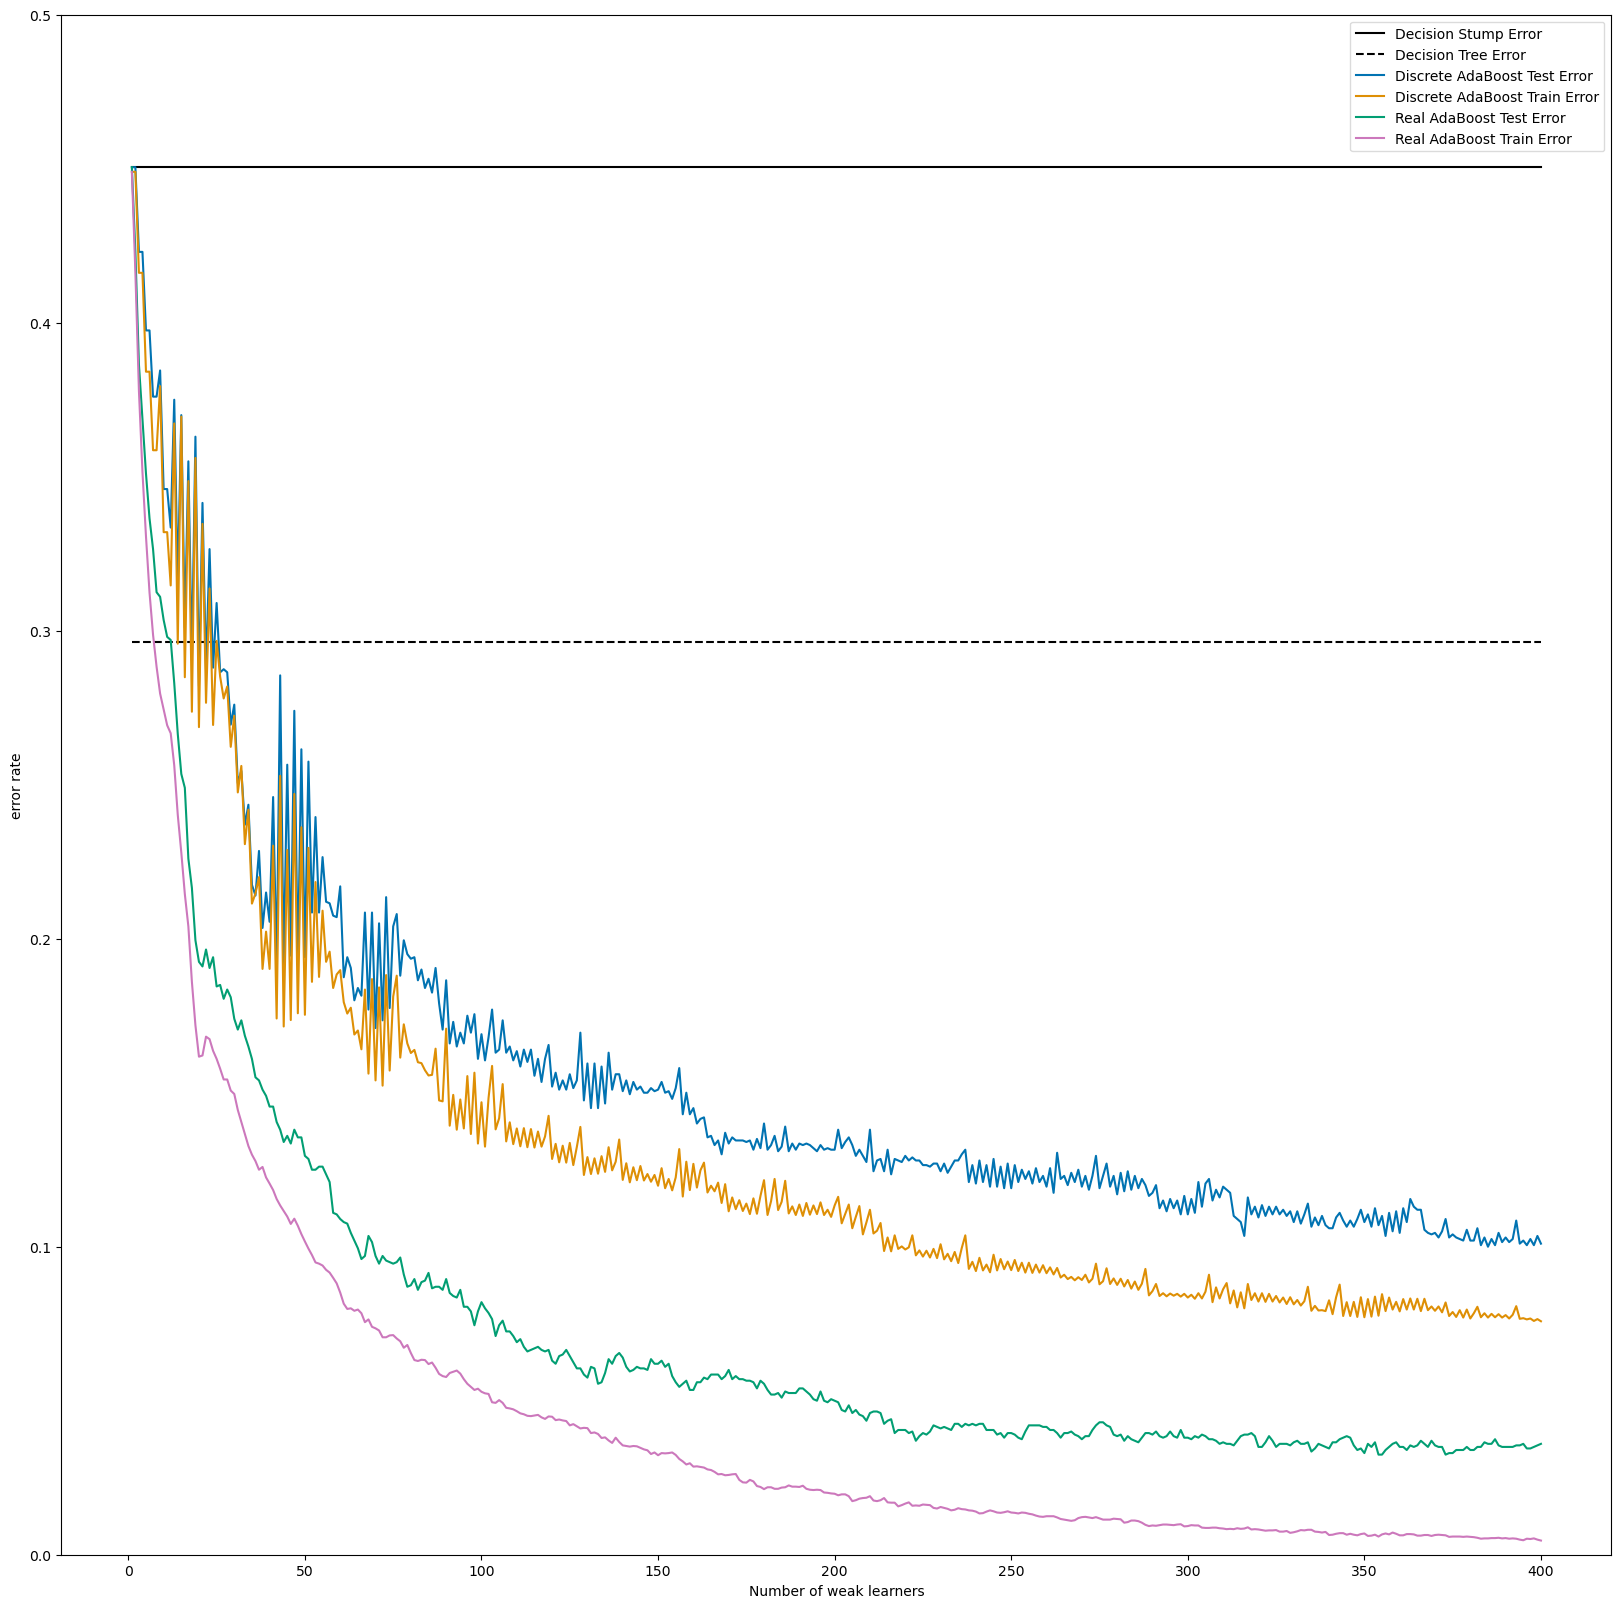

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, "k-", label="Decision Stump Error")
ax.plot([1, n_estimators], [dt_err] * 2, "k--", label="Decision Tree Error")

colors = sns.color_palette("colorblind")

ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err,
    label="Discrete AdaBoost Test Error",
    color=colors[0],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err_train,
    label="Discrete AdaBoost Train Error",
    color=colors[1],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[2],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[4],
)

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("error rate")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()